In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import sample_utils

%matplotlib inline

# TRUE DATA

In [2]:
file_path = '2020_LER_20201021_testset.xlsx'

data = np.load('../data_handler/'+file_path+'.npy', allow_pickle=True)
num_in_cycle = [232, 289, 277, 253, 255, 250, 250, 250] 
num_of_cycle = 8
    
X_all, Y_all, X_per_cycle, Y_per_cycle = data[0], data[1], data[2], data[3]
print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)
print()
test_real = Y_all

# for pair plot indexing
test_X_cycle = X_per_cycle

y_mean = np.mean(Y_all, axis=0, dtype=np.float32)
y_std = np.std(Y_all, axis=0, dtype=np.float32)

print("!! check !! test real shape", test_real.shape)
print("!! check !! X value ( especially its precision )")
print()
for i in range(num_of_cycle):
    print(test_X_cycle[i])

(2056, 5) (2056, 6) (8, 5) (8, 6)

!! check !! test real shape (2056, 6)
!! check !! X value ( especially its precision )

[  0.62484672  17.00743225 173.85718891   1.           0.        ]
[ 0.55654727 80.91905766 80.56986979  1.          0.        ]
[ 0.50466944 48.62398816 67.99380535  1.          0.        ]
[ 0.56045148 25.42868151 69.39740975  1.          0.        ]
[ 0.63730798 69.14860261 65.33037708  1.          0.        ]
[ 0.15273618 23.32639122 51.25326965  1.          0.        ]
[ 0.25925637 78.12653757 28.08679576  1.          0.        ]
[1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


# GENERATED DATA
### Please put your sampled data file(in .npy) in the same directory

In [3]:
########################################  CHANGE HERE ####################################################################

result = 'test_specificdate_201101_data_2020_LER_20201008_V008.xlsx_model_mlp_gan1_seed_0_lr_5e-05_0.0001_0.0005_hidden_dim_200_100_batch_size_32_noise_d_100_sample_num_250_pdrop_0.9.npy'

##########################################################################################################################

test_gen = np.load(result, allow_pickle=True)

test_gen = test_gen[:2000]
num_of_cycle = 8


test_gen_sample_num = int(test_gen.shape[0]/num_of_cycle)

print("test data sample num", test_gen_sample_num)
print("test data shape", test_gen.shape)


test data sample num 250
test data shape (2000, 6)


# EMD pdf

In [4]:
# EMD  

EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_pdf(generated_samples = test_gen, real_samples = test_real, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=[test_gen_sample_num]*num_of_cycle, num_in_real_list = num_in_cycle) 

print(EMD_1d_score_list.shape)
print(EMD_2d_score_list.shape)

EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

EMD_score = np.mean(EMD_score_cat)
EMD_score_list_pdf = np.mean(EMD_score_cat,axis=1)
EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_pdf)**2))

for i in range(len(EMD_score_list_pdf)):
    print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_pdf[i], (EMD_score_list_pdf[i]-EMD_score)/EMD_std))
# A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

EMD_score_list = np.array(EMD_score_list_pdf)
 
print("EMD argsort: ", EMD_score_list.argsort())




(8, 6)
(8, 15)
EMD_score for each X factor 0 	 score 0.311774 	 dev 0.207060
EMD_score for each X factor 1 	 score 0.250072 	 dev -0.671065
EMD_score for each X factor 2 	 score 0.293436 	 dev -0.053924
EMD_score for each X factor 3 	 score 0.200230 	 dev -1.380414
EMD_score for each X factor 4 	 score 0.221229 	 dev -1.081556
EMD_score for each X factor 5 	 score 0.380875 	 dev 1.190501
EMD_score for each X factor 6 	 score 0.301087 	 dev 0.054962
EMD_score for each X factor 7 	 score 0.419094 	 dev 1.734437
EMD argsort:  [3 4 1 2 6 0 5 7]


# EMD integral

In [5]:
# EMD  

EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_gen, real_samples = test_real, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=[test_gen_sample_num]*num_of_cycle, num_in_real_list = num_in_cycle) 

print(EMD_1d_score_list.shape)
print(EMD_2d_score_list.shape)

EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

EMD_score = np.mean(EMD_score_cat)
EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

for i in range(len(EMD_score_list_integral)):
    print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_integral[i], (EMD_score_list_integral[i]-EMD_score)/EMD_std))
# A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

EMD_score_list = np.array(EMD_score_list_integral)
 
print("EMD argsort: ", EMD_score_list.argsort())

(8, 6)
(8, 15)
EMD_score for each X factor 0 	 score 0.328622 	 dev 0.094186
EMD_score for each X factor 1 	 score 0.258371 	 dev -0.575827
EMD_score for each X factor 2 	 score 0.281773 	 dev -0.352635
EMD_score for each X factor 3 	 score 0.181158 	 dev -1.312245
EMD_score for each X factor 4 	 score 0.229139 	 dev -0.854631
EMD_score for each X factor 5 	 score 0.402608 	 dev 0.799815
EMD_score for each X factor 6 	 score 0.328775 	 dev 0.095637
EMD_score for each X factor 7 	 score 0.539530 	 dev 2.105699
EMD argsort:  [3 4 1 2 0 6 5 7]


# GEN / REAL ( 개당 250개, 8set ) Pair plot

# 1. Custom scale


factor 0
0 232
Generated sample shape: (250, 6)
real sample shape: (232, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (232, 1)
minimum y value for each varaible: [2.23476309e-13 2.95697319e-05 1.23088852e-05 3.21520980e-01
 3.34330241e-01 6.05257613e+01 0.00000000e+00]
maximum y value for each varaible: [6.72747971e-12 4.47500000e-05 1.84700000e-05 3.82159128e-01
 3.87946434e-01 6.32420000e+01 1.00000000e+00]
X input [  0.62484672  17.00743225 173.85718891   1.           0.        ]


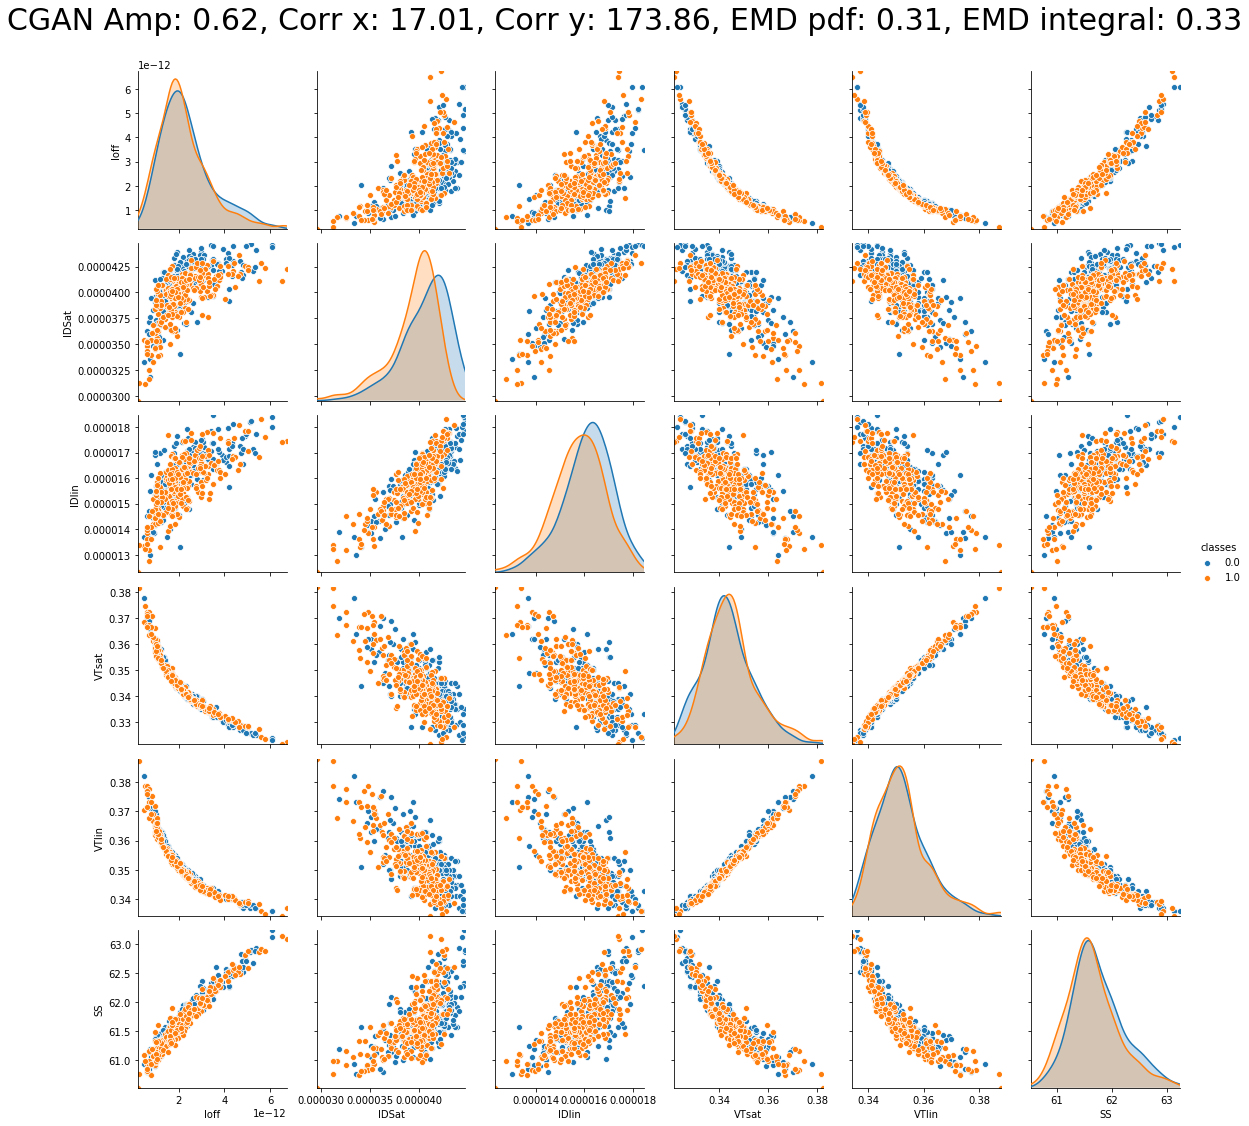

factor 1
232 521
Generated sample shape: (250, 6)
real sample shape: (289, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (289, 1)
minimum y value for each varaible: [5.88273432e-13 3.09394509e-05 1.32079515e-05 3.24000000e-01
 3.36000000e-01 6.09065808e+01 0.00000000e+00]
maximum y value for each varaible: [6.00900000e-12 4.50700000e-05 1.81100000e-05 3.72735332e-01
 3.78473100e-01 6.30910000e+01 1.00000000e+00]
X input [ 0.55654727 80.91905766 80.56986979  1.          0.        ]


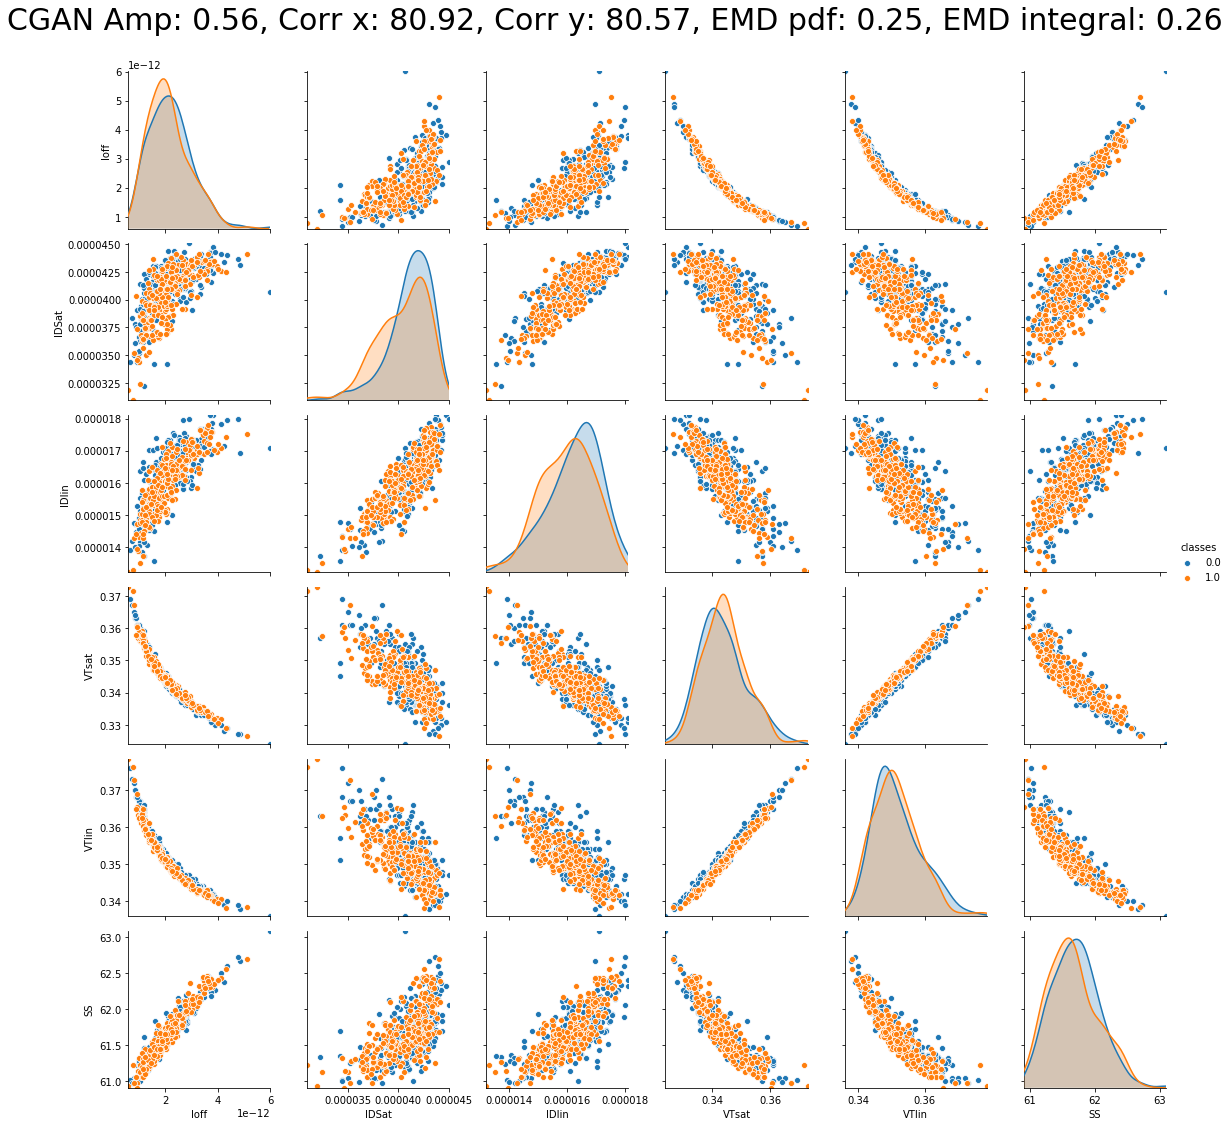

factor 2
521 798
Generated sample shape: (250, 6)
real sample shape: (277, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (277, 1)
minimum y value for each varaible: [6.51058509e-13 3.06100780e-05 1.29975823e-05 3.26000000e-01
 3.37884973e-01 6.08530000e+01 0.00000000e+00]
maximum y value for each varaible: [5.11673966e-12 4.46500000e-05 1.83700000e-05 3.73087937e-01
 3.79551198e-01 6.28320000e+01 1.00000000e+00]
X input [ 0.50466944 48.62398816 67.99380535  1.          0.        ]


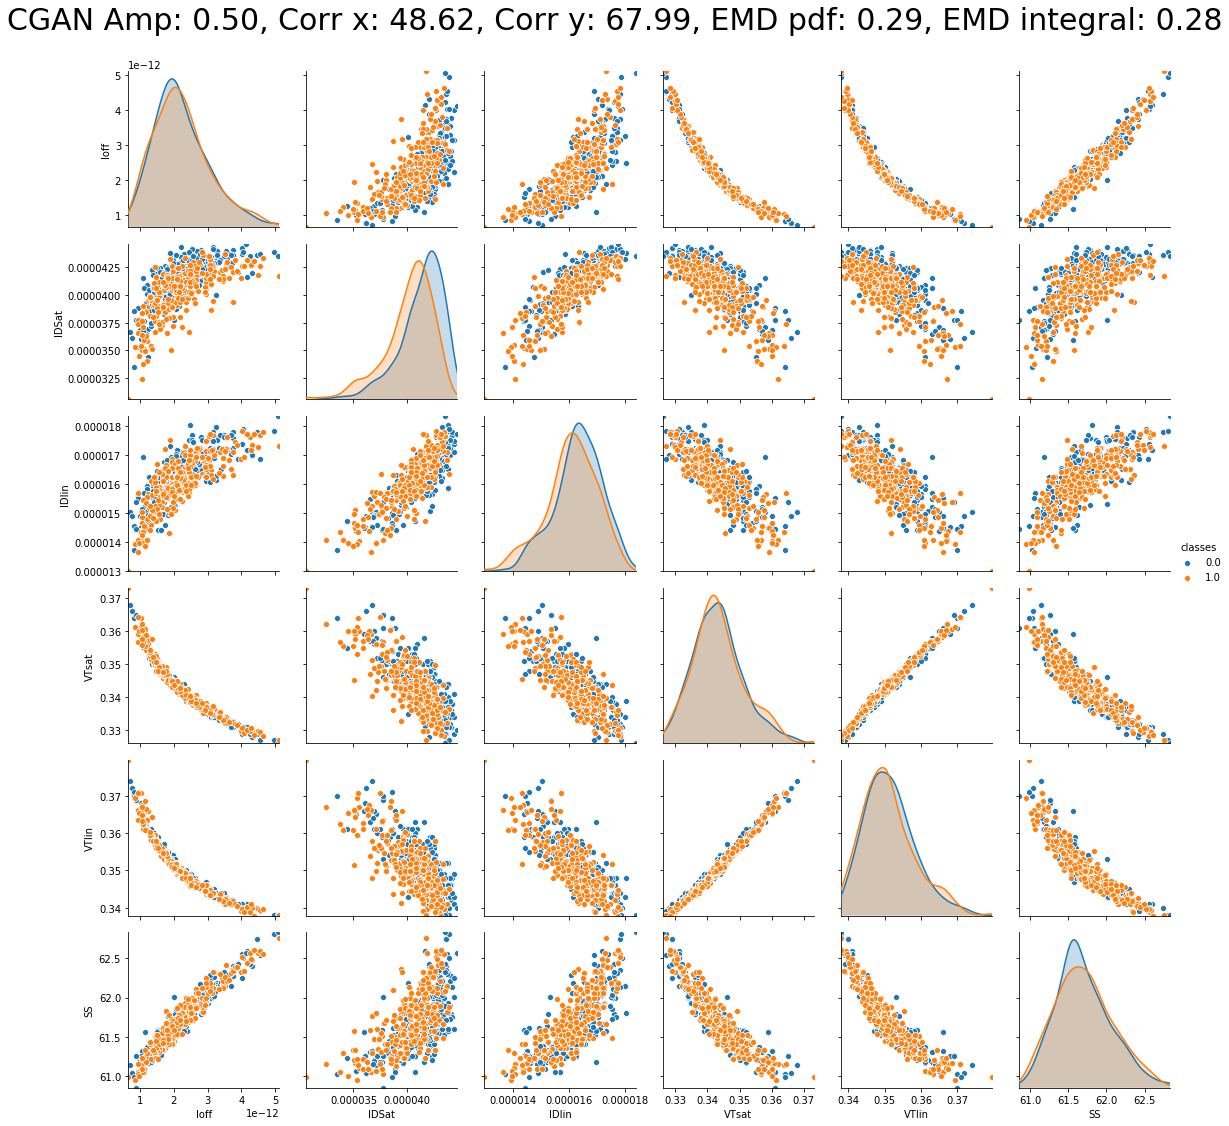

factor 3
798 1051
Generated sample shape: (250, 6)
real sample shape: (253, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (253, 1)
minimum y value for each varaible: [5.11763372e-13 3.16500000e-05 1.29000000e-05 3.23000000e-01
 3.35000000e-01 6.08168117e+01 0.00000000e+00]
maximum y value for each varaible: [6.050e-12 4.455e-05 1.807e-05 3.730e-01 3.780e-01 6.304e+01 1.000e+00]
X input [ 0.56045148 25.42868151 69.39740975  1.          0.        ]


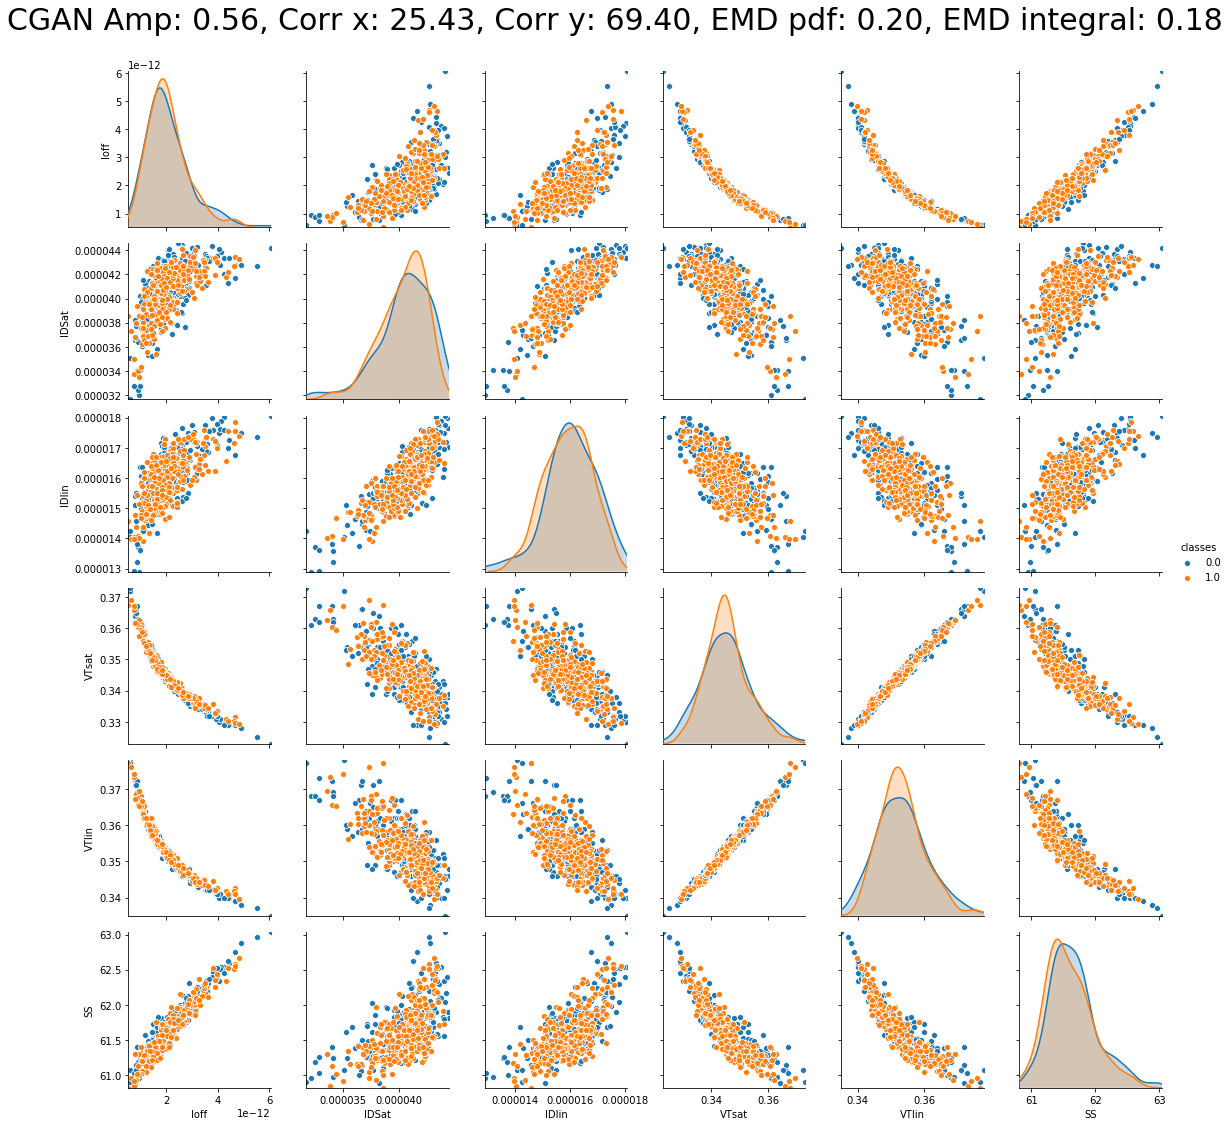

factor 4
1051 1306
Generated sample shape: (250, 6)
real sample shape: (255, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (255, 1)
minimum y value for each varaible: [3.02200000e-13 2.80400000e-05 1.15000000e-05 3.23000000e-01
 3.35000000e-01 6.06937695e+01 0.00000000e+00]
maximum y value for each varaible: [6.46590440e-12 4.49600000e-05 1.84600644e-05 3.94000000e-01
 3.97000000e-01 6.32677990e+01 1.00000000e+00]
X input [ 0.63730798 69.14860261 65.33037708  1.          0.        ]


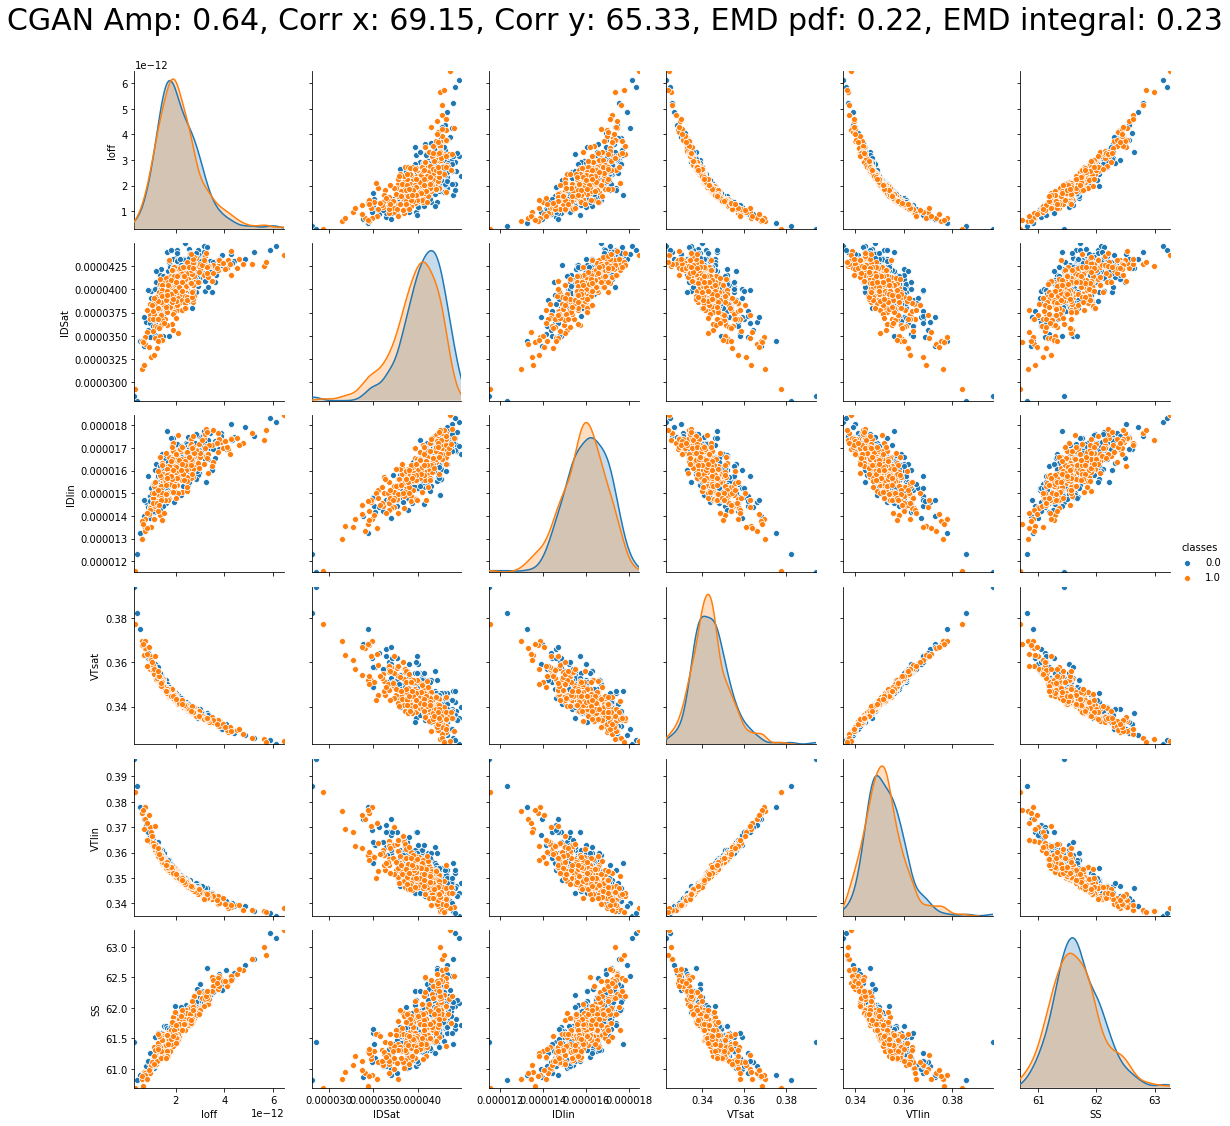

factor 5
1306 1556
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
minimum y value for each varaible: [1.60200000e-12 4.05062921e-05 1.58000000e-05 3.35531974e-01
 3.45000000e-01 6.13550000e+01 0.00000000e+00]
maximum y value for each varaible: [2.86759400e-12 4.43847323e-05 1.74170250e-05 3.48000000e-01
 3.55000000e-01 6.18760844e+01 1.00000000e+00]
X input [ 0.15273618 23.32639122 51.25326965  1.          0.        ]


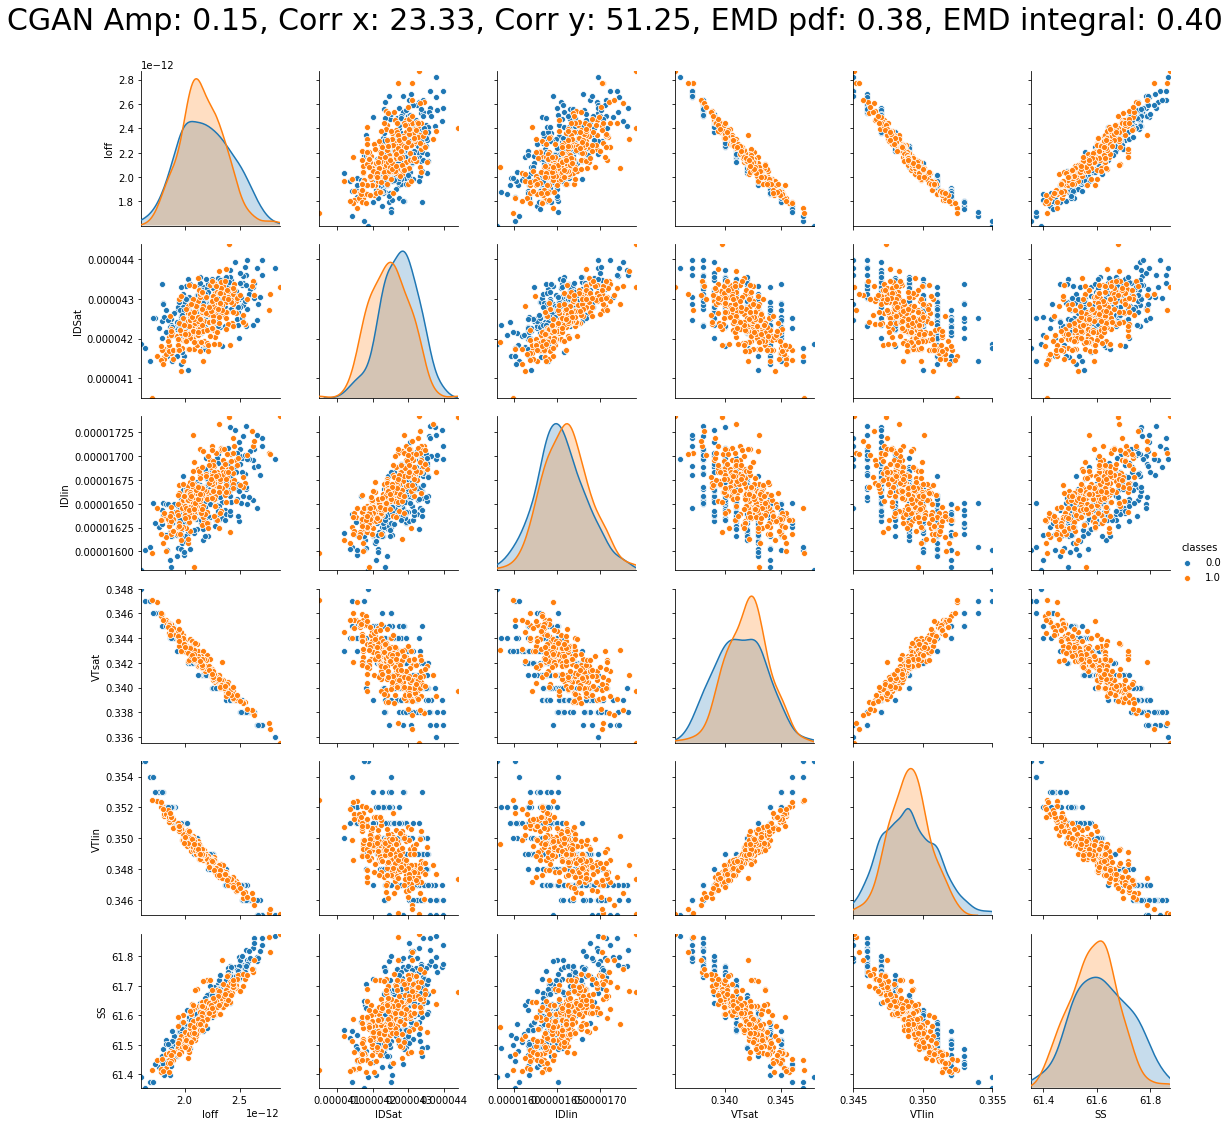

factor 6
1556 1806
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
minimum y value for each varaible: [1.46300000e-12 3.91500000e-05 1.53400000e-05 3.30407340e-01
 3.41944589e-01 6.12497207e+01 0.00000000e+00]
maximum y value for each varaible: [3.56741193e-12 4.45600000e-05 1.78438099e-05 3.50000000e-01
 3.57552865e-01 6.21800000e+01 1.00000000e+00]
X input [ 0.25925637 78.12653757 28.08679576  1.          0.        ]


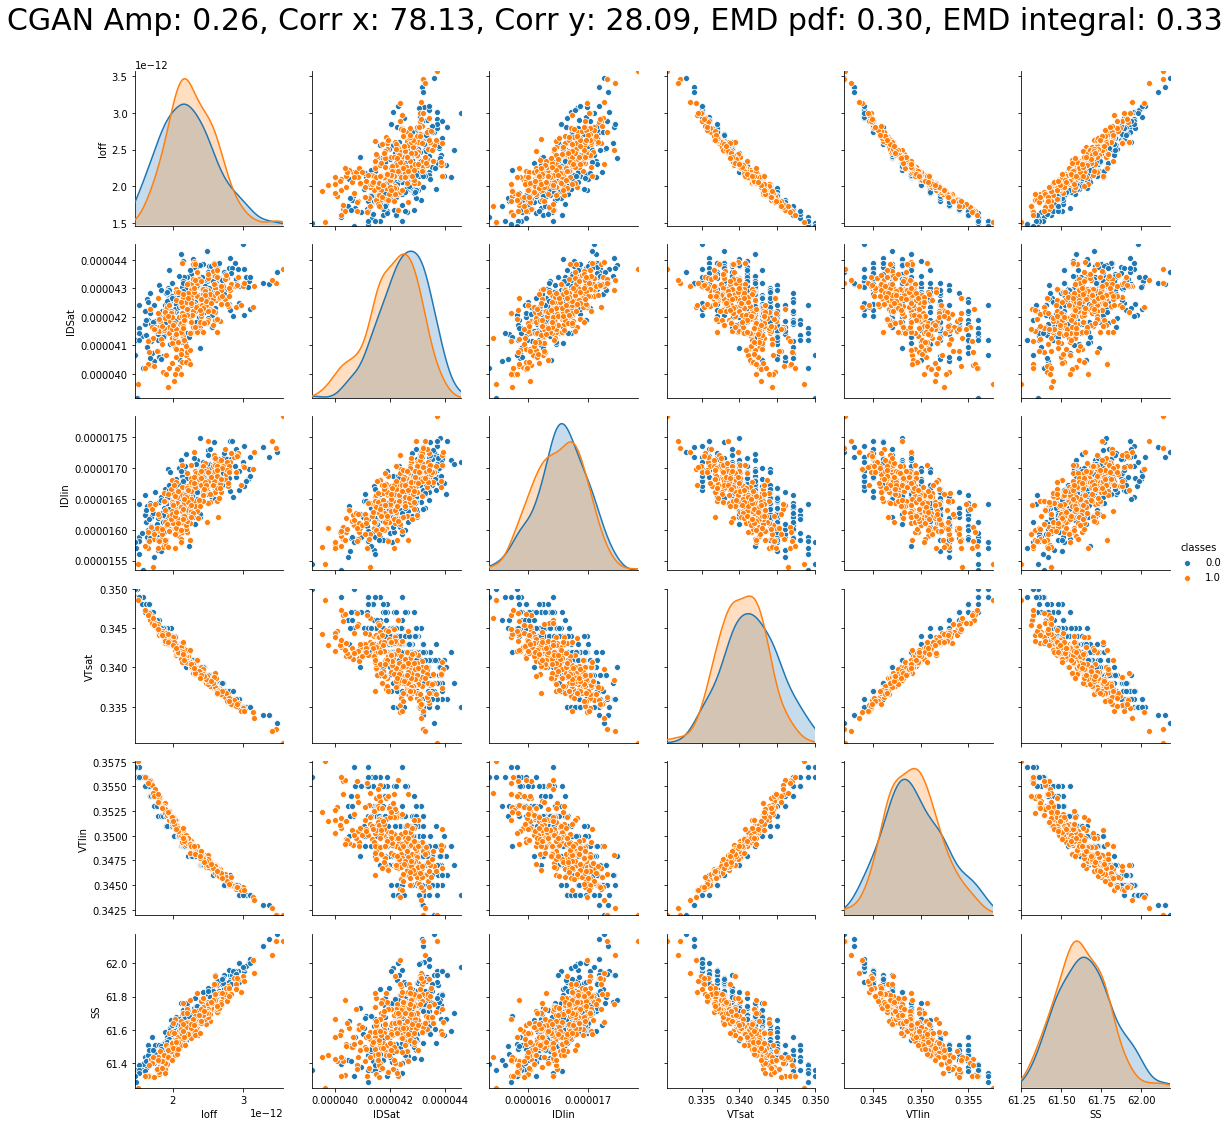

factor 7
1806 2056
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
minimum y value for each varaible: [1.4630e-12 3.9150e-05 1.5340e-05 3.3300e-01 3.4200e-01 6.1283e+01
 0.0000e+00]
maximum y value for each varaible: [3.480e-12 4.456e-05 1.749e-05 3.500e-01 3.570e-01 6.218e+01 1.000e+00]
X input [1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


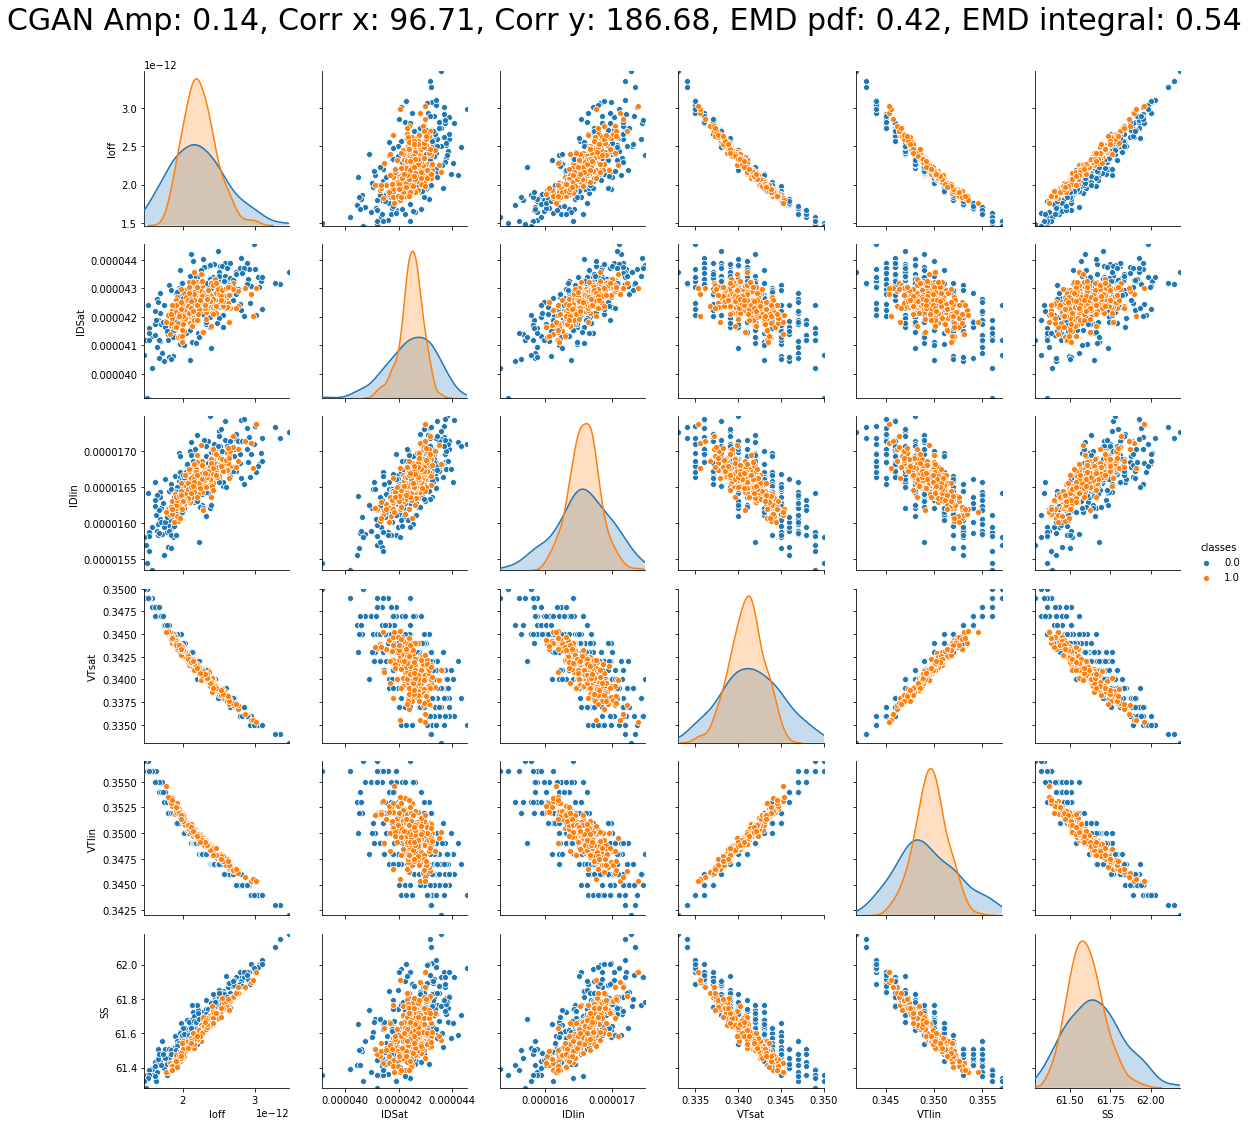

In [6]:
# gen_factor = 7
# test_sample_num = int(total_result_test.shape[0]/15)
# test_gan_matrix_plot = total_result_test[gen_factor * test_sample_num:(gen_factor+1)*test_sample_num]

for factor in range(num_of_cycle):
    
    print("factor", factor)

    ##############################################################################################################
    """
    for i in range(6):
        print(np.min(total_result[:,i]))
        print(np.max(total_result[:,i]))
        print(np.min(real[:,i]))
        print(np.max(real[:,i]))
    """

    # generated sample
    print(sum(num_in_cycle[:factor]),sum(num_in_cycle[:factor])+num_in_cycle[factor])
    test_gan_matrix_plot = test_gen[factor * test_gen_sample_num:(factor+1)*test_gen_sample_num]
    print("Generated sample shape:", test_gan_matrix_plot.shape)

    # real sample
    test_real_matrix_plot = test_real[sum(num_in_cycle[:factor]):sum(num_in_cycle[:factor])+num_in_cycle[factor]]
    print("real sample shape:", test_real_matrix_plot.shape)
    print()

    # Assigning class(generated: 0, real:1 ) for visualization

    print("Assigning class for visualization (generated: 0, real:1 )")

    test_gan_cls = np.ones((test_gen_sample_num, 1))
    print("generated sample class shape:", test_gan_cls.shape)
    test_real_cls = np.zeros((num_in_cycle[factor], 1))
    print("real sample class shape:", test_real_cls.shape)

    test_temp1 = np.hstack([test_gan_matrix_plot, test_gan_cls])
    test_temp2 = np.hstack([test_real_matrix_plot, test_real_cls])

    # TOTAL PANDAS DATA
    total_test_matrix_plot = np.vstack([test_temp1, test_temp2])
    # print(total_matrix_plot.shape)

    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(total_test_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
    # print(df1)

#    print(df1_test)
    
        # min, max for generated Y value ( used for scatter plot limit standard )

    test_min_list = total_test_matrix_plot.min(axis=0)
    test_max_list = total_test_matrix_plot.max(axis=0)
    print("minimum y value for each varaible:", test_min_list)
    print("maximum y value for each varaible:", test_max_list)

    X_test = X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test, hue = 'classes')
    for i in range(6):
        g.fig.suptitle("CGAN Amp: {:.2f}, Corr x: {:.2f}, Corr y: {:.2f}, EMD pdf: {:.2f}, EMD integral: {:.2f}".format(X_test[0], X_test[1], X_test[2], EMD_score_list_pdf[factor], EMD_score_list_integral[factor]), y=1.04, fontsize=30)
        g.axes[i,i].set_xlim((test_min_list[i],test_max_list[i]))
        g.axes[i,i].set_ylim((test_min_list[i],test_max_list[i]))
    
    plt.tight_layout()
#     plt.savefig('figures/Test_Custom_factor_{}_sample_{}.pdf'.format(factor, test_gen_sample_num), bbox_inches='tight')
    
    plt.show()


    ### 파란색이 real 주황색이 generated

# 2. Same scale

minimum y value for each varaible: [3.0220e-13 2.8040e-05 1.1500e-05 3.2300e-01 3.3500e-01 6.0765e+01]
maximum y value for each varaible: [6.1180e-12 4.5070e-05 1.8470e-05 3.9400e-01 3.9700e-01 6.3242e+01]
minimum y value for each varaible: [2.23476309e-13 2.93370121e-05 1.15522940e-05 3.21520980e-01
 3.34330241e-01 6.05257613e+01]
maximum y value for each varaible: [6.72747971e-12 4.43847323e-05 1.84600644e-05 3.82159128e-01
 3.87946434e-01 6.32677990e+01]
factor 0
0 232
Generated sample shape: (250, 6)
real sample shape: (232, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (232, 1)
X input [  0.62484672  17.00743225 173.85718891   1.           0.        ]


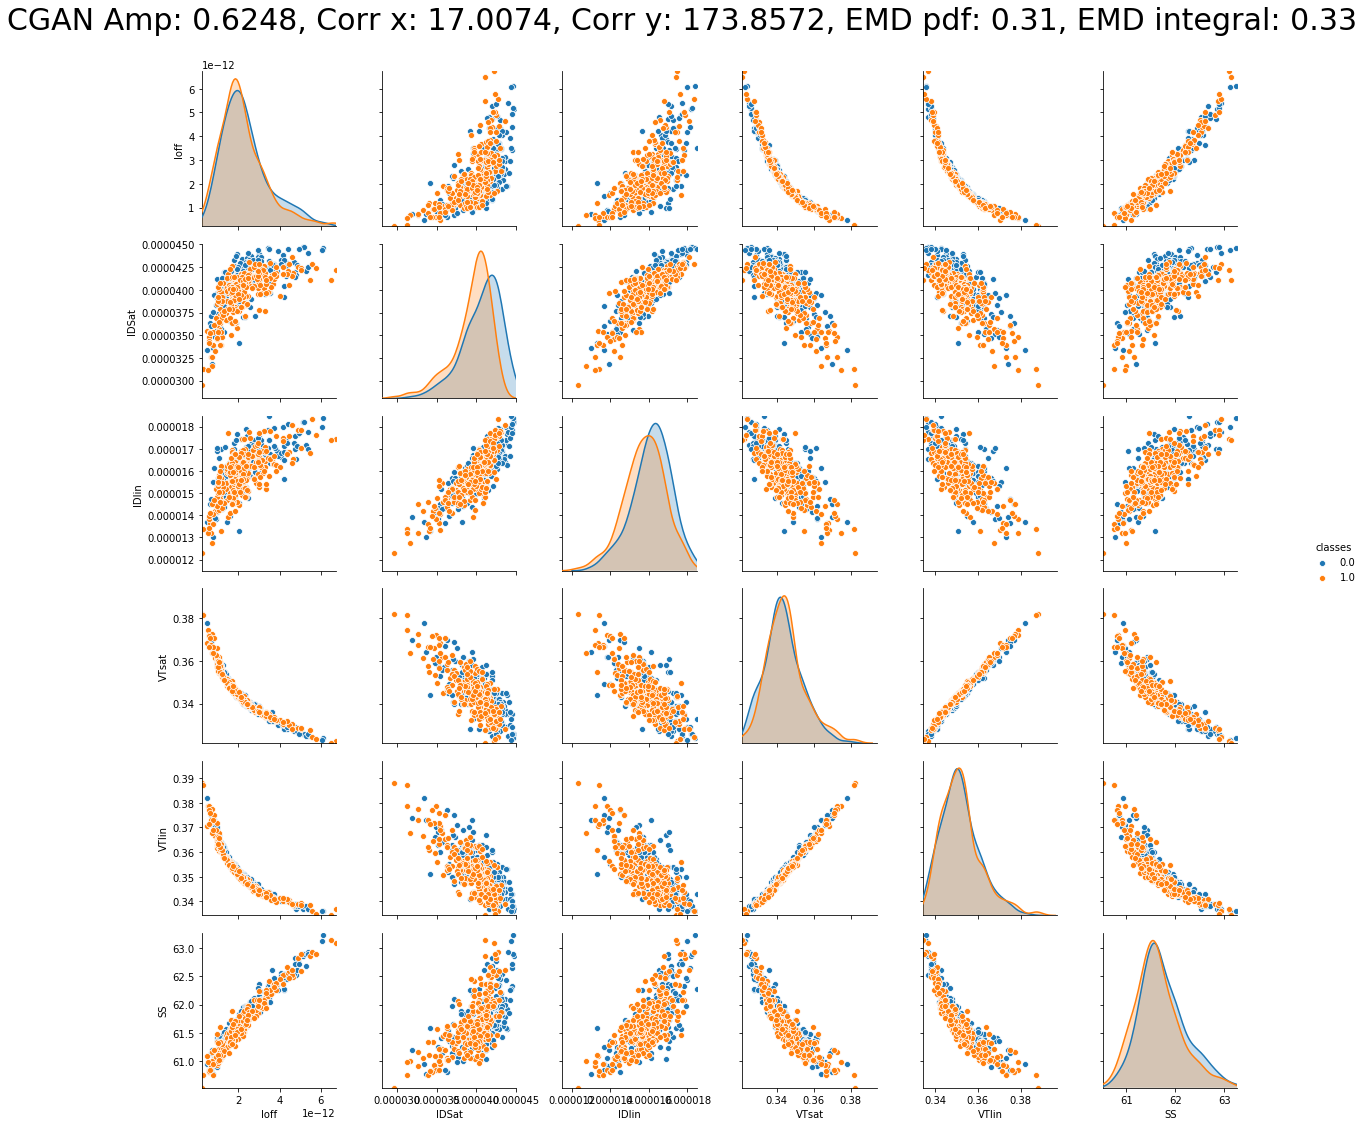

factor 1
232 521
Generated sample shape: (250, 6)
real sample shape: (289, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (289, 1)
X input [ 0.55654727 80.91905766 80.56986979  1.          0.        ]


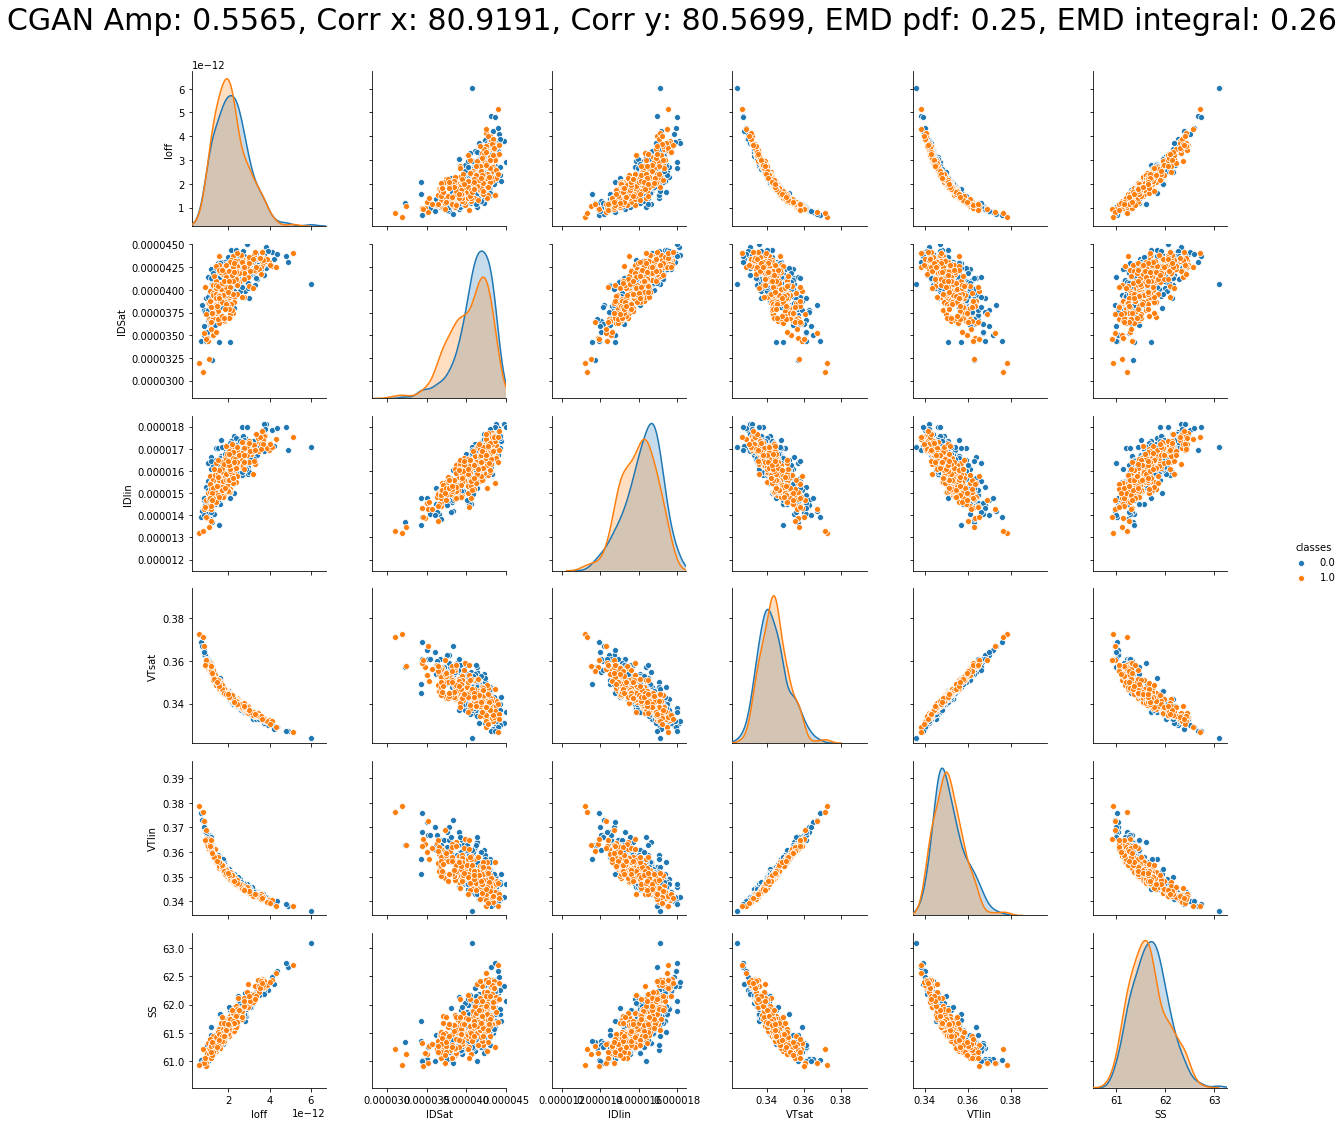

factor 2
521 798
Generated sample shape: (250, 6)
real sample shape: (277, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (277, 1)
X input [ 0.50466944 48.62398816 67.99380535  1.          0.        ]


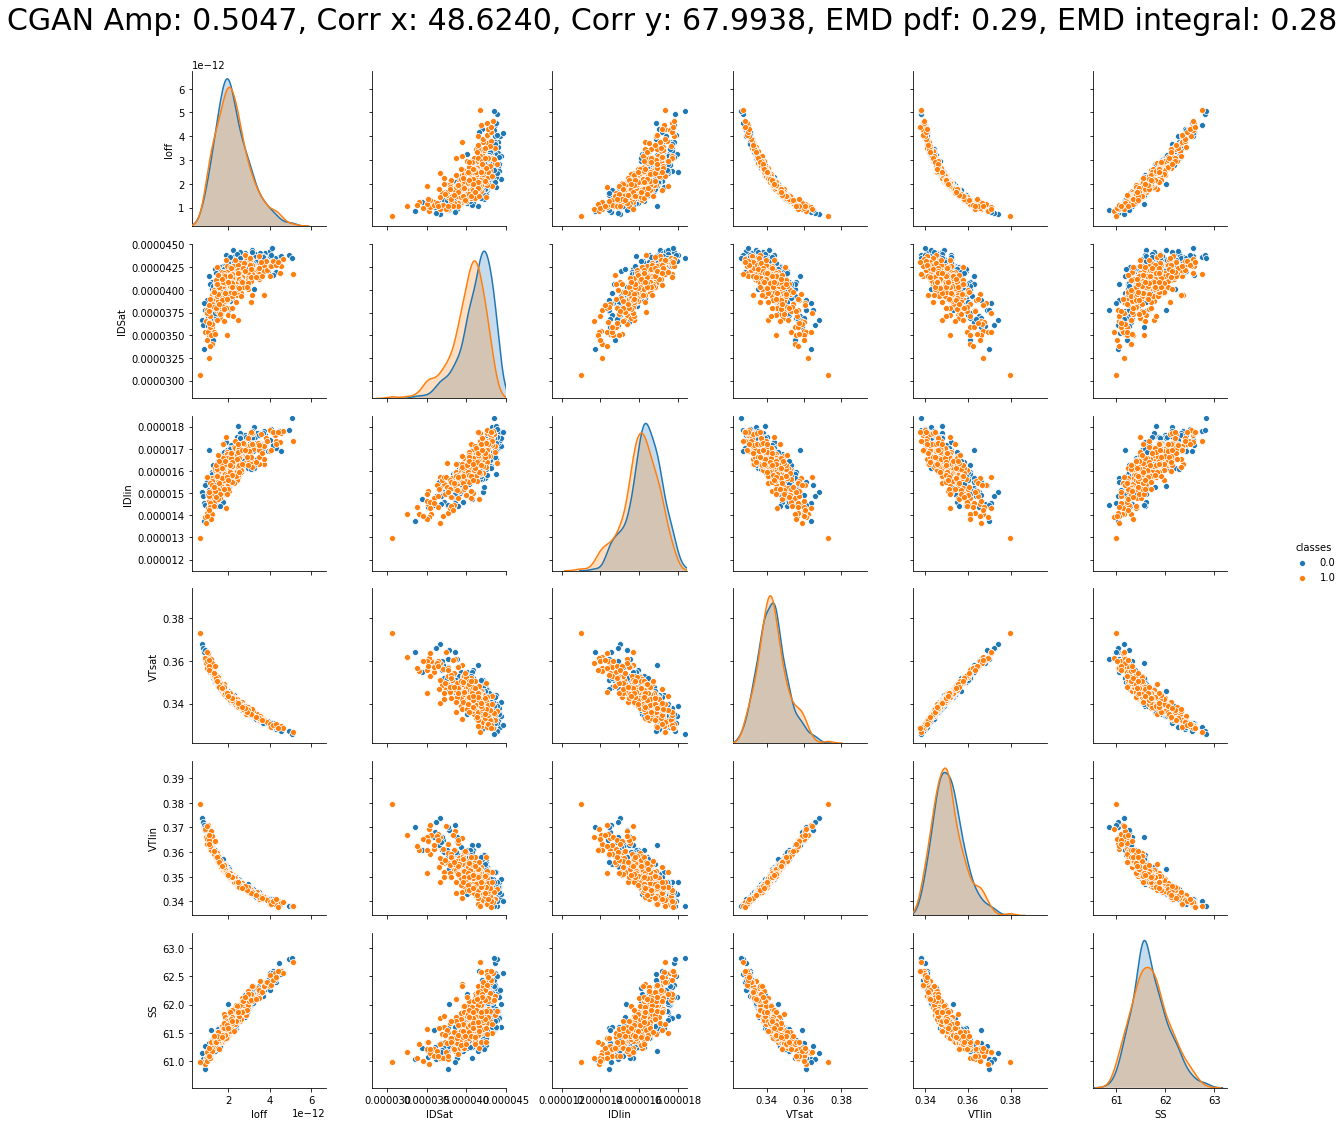

factor 3
798 1051
Generated sample shape: (250, 6)
real sample shape: (253, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (253, 1)
X input [ 0.56045148 25.42868151 69.39740975  1.          0.        ]


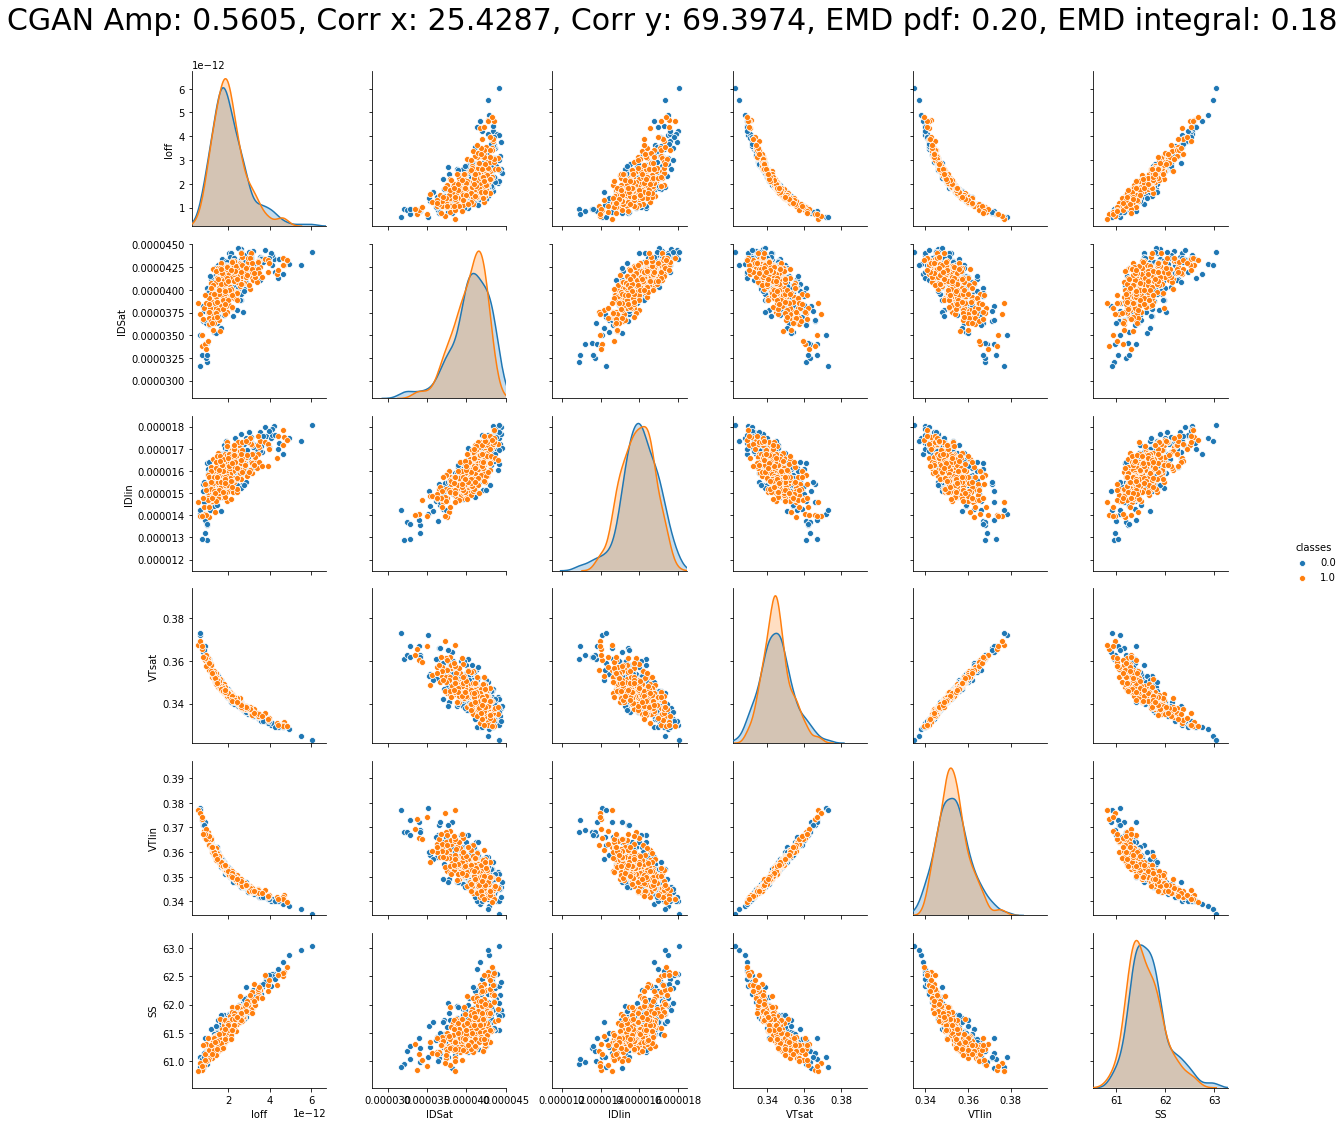

factor 4
1051 1306
Generated sample shape: (250, 6)
real sample shape: (255, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (255, 1)
X input [ 0.63730798 69.14860261 65.33037708  1.          0.        ]


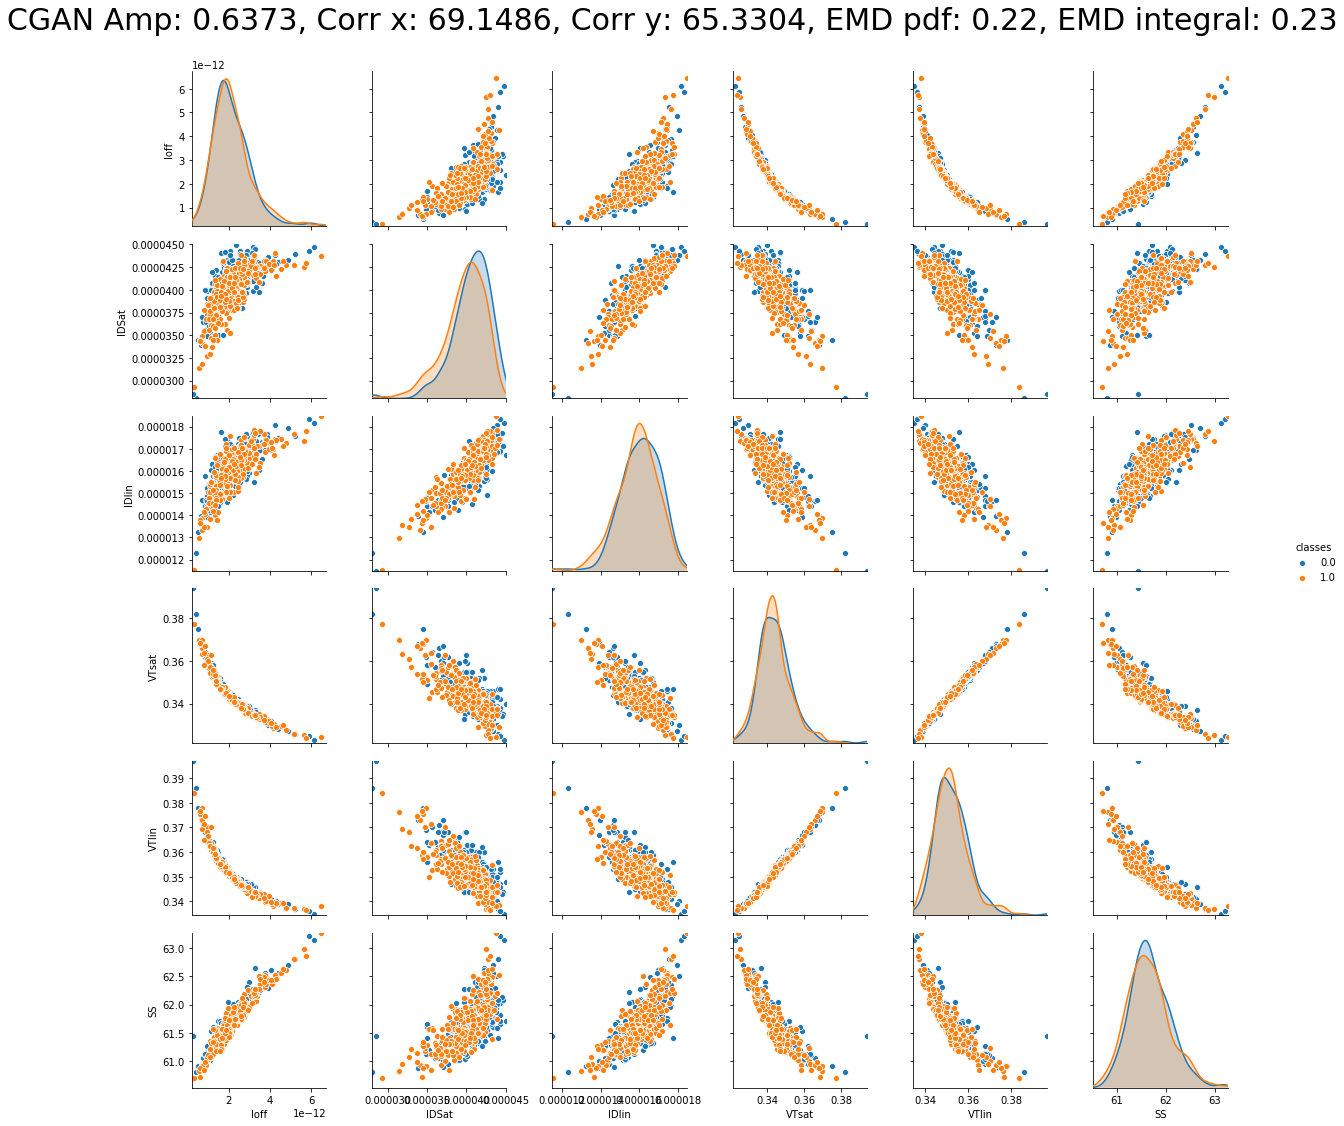

factor 5
1306 1556
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [ 0.15273618 23.32639122 51.25326965  1.          0.        ]


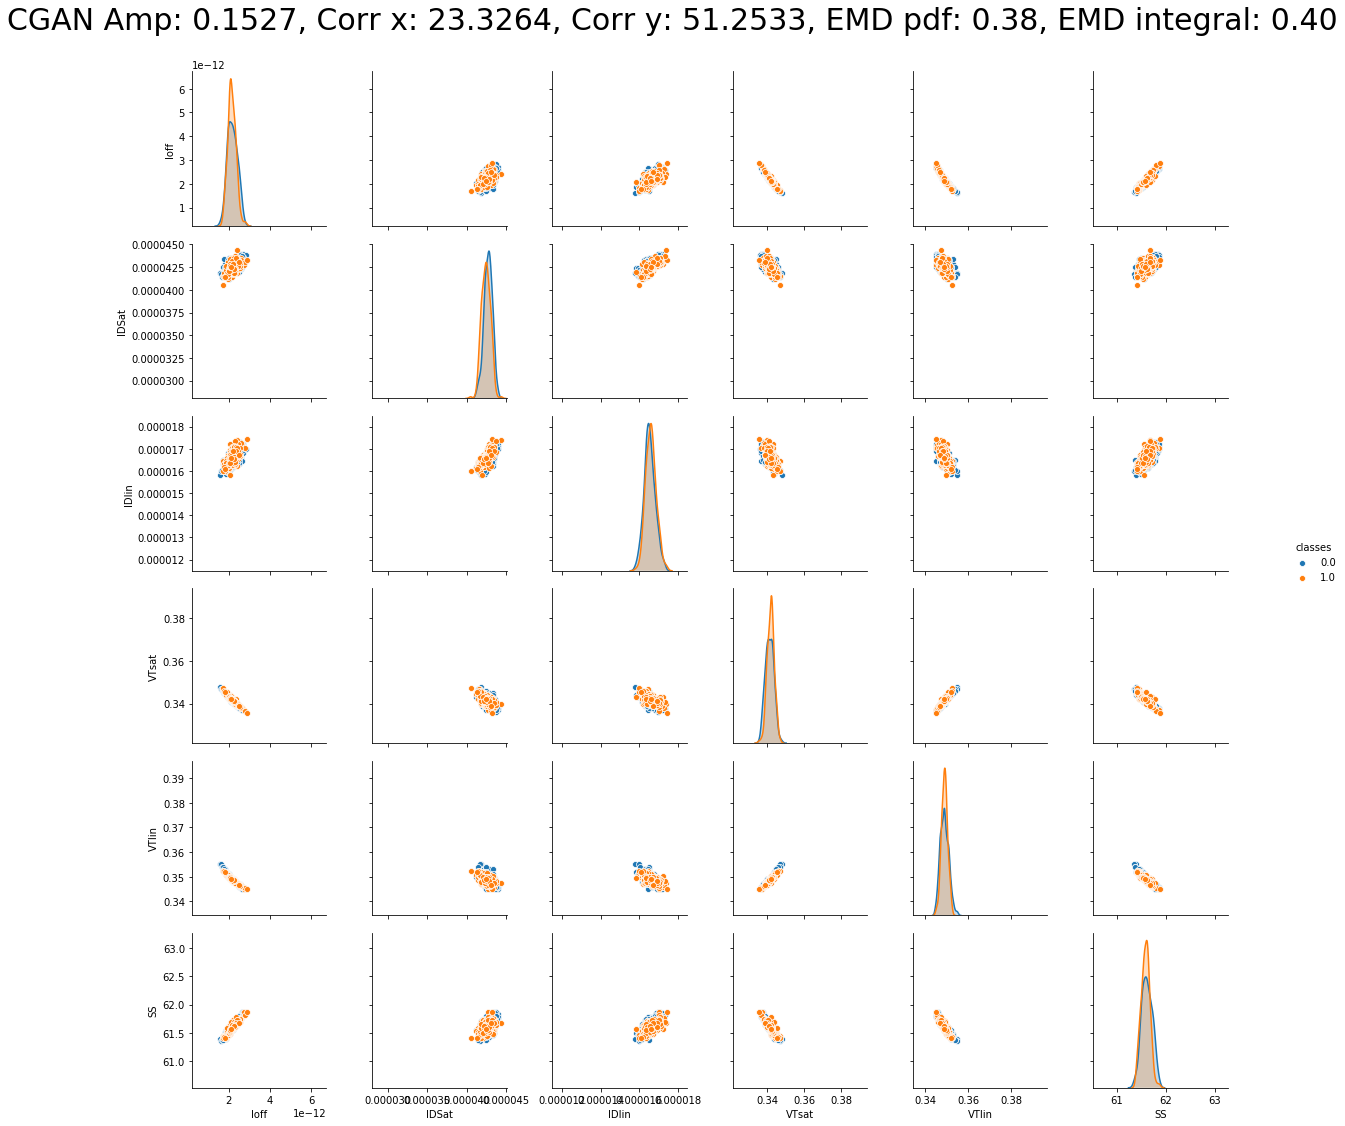

factor 6
1556 1806
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [ 0.25925637 78.12653757 28.08679576  1.          0.        ]


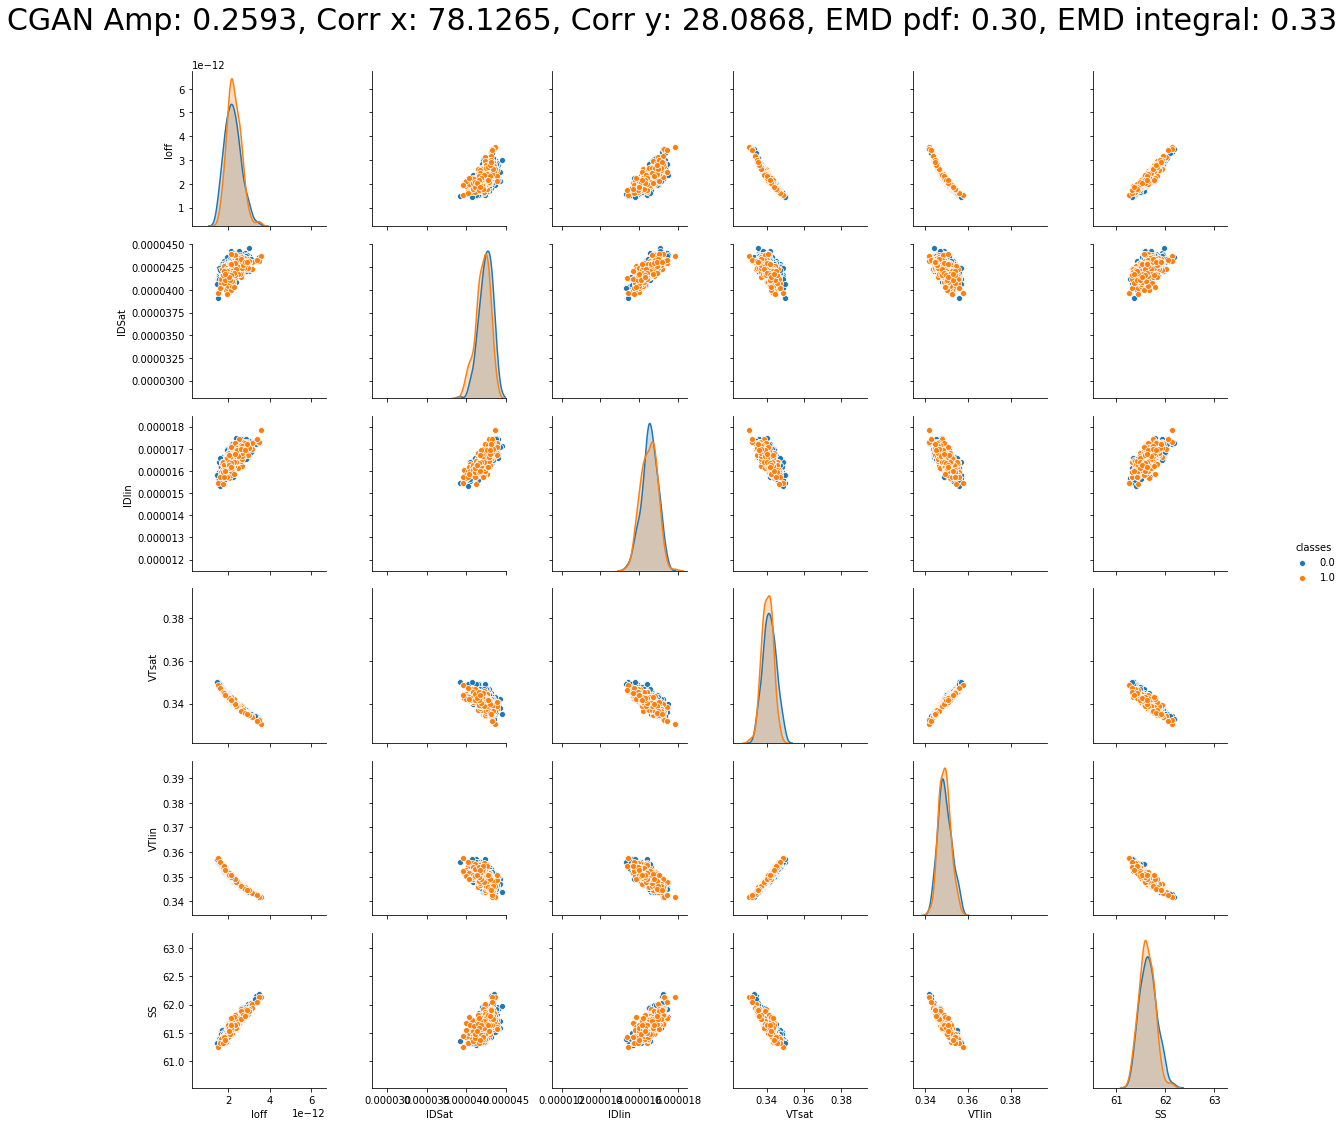

factor 7
1806 2056
Generated sample shape: (250, 6)
real sample shape: (250, 6)

Assigning class for visualization (generated: 0, real:1 )
generated sample class shape: (250, 1)
real sample class shape: (250, 1)
X input [1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


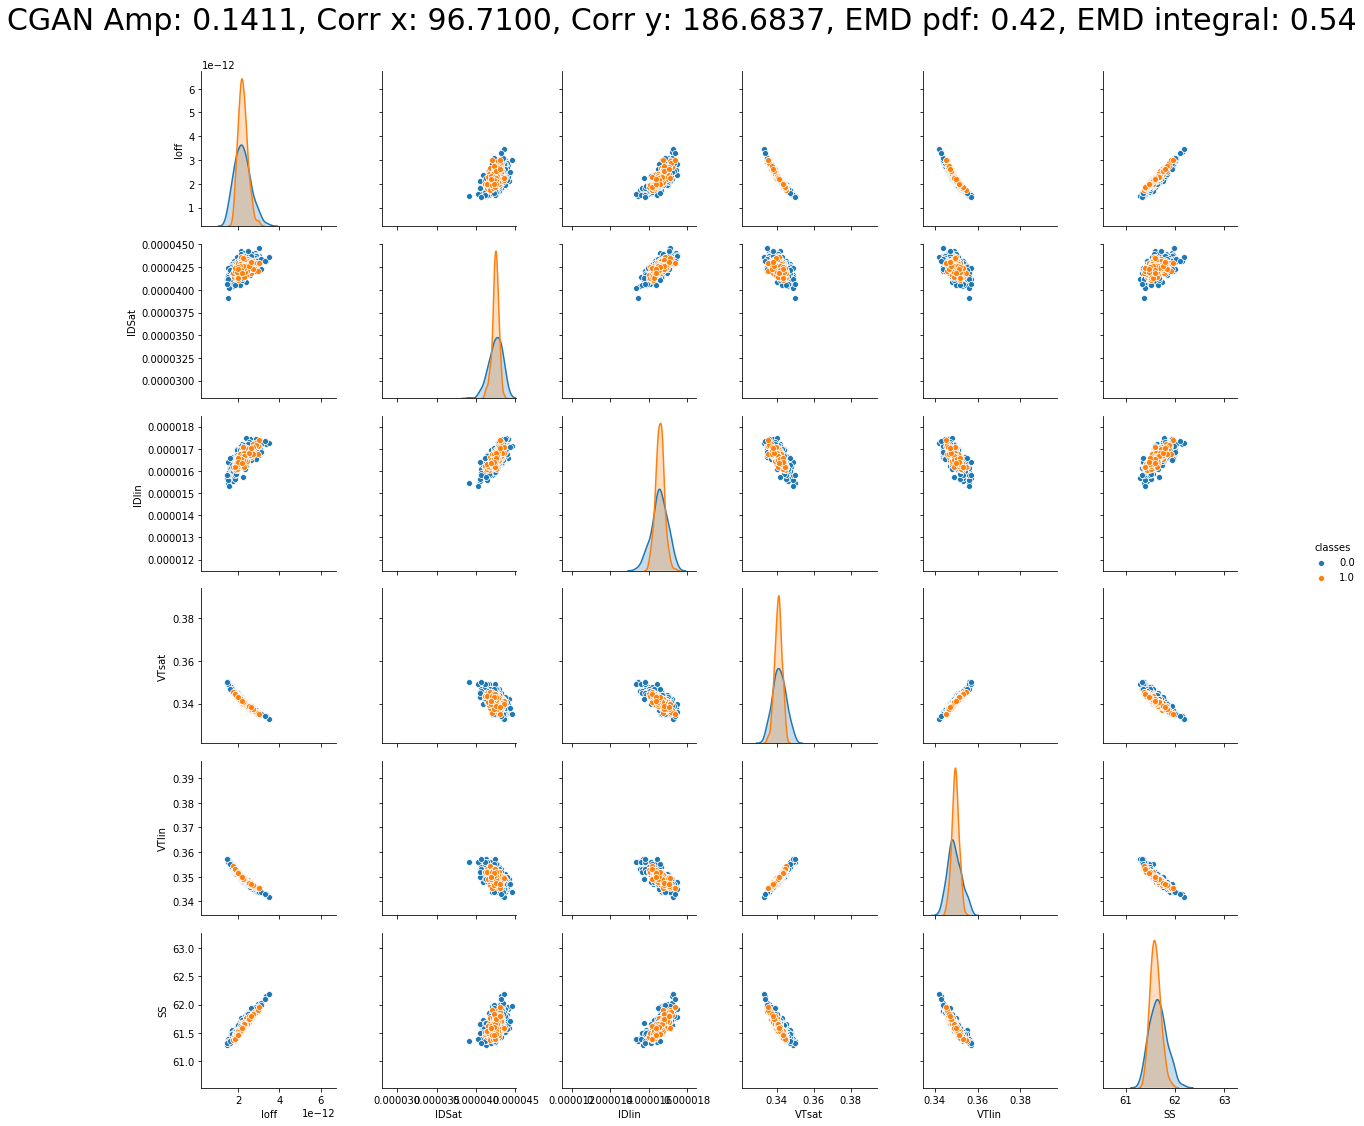

In [7]:

min1_per_out_v = test_real.min(axis=0)
max1_per_out_v = test_real.max(axis=0)
print("minimum y value for each varaible:", min1_per_out_v)
print("maximum y value for each varaible:", max1_per_out_v)

min2_per_out_v = test_gen.min(axis=0)
max2_per_out_v = test_gen.max(axis=0)
print("minimum y value for each varaible:", min2_per_out_v)
print("maximum y value for each varaible:", max2_per_out_v)

min_per_out_v = []
max_per_out_v = []

for i in range(6):
    min_per_out_v.append(min1_per_out_v[i] if min1_per_out_v[i] < min2_per_out_v[i] else min2_per_out_v[i])
    max_per_out_v.append(max1_per_out_v[i] if max1_per_out_v[i] > max2_per_out_v[i] else max2_per_out_v[i])

    
for factor in range(num_of_cycle):
    
    print("factor", factor)

    ##############################################################################################################
    """
    for i in range(6):
        print(np.min(total_result[:,i]))
        print(np.max(total_result[:,i]))
        print(np.min(real[:,i]))
        print(np.max(real[:,i]))
    """

    # generated sample
    print(sum(num_in_cycle[:factor]),sum(num_in_cycle[:factor])+num_in_cycle[factor])
    test_gan_matrix_plot = test_gen[factor * test_gen_sample_num:(factor+1)*test_gen_sample_num]
    print("Generated sample shape:", test_gan_matrix_plot.shape)

    # real sample
    test_real_matrix_plot = test_real[sum(num_in_cycle[:factor]):sum(num_in_cycle[:factor])+num_in_cycle[factor]]
    print("real sample shape:", test_real_matrix_plot.shape)
    print()

    # Assigning class(generated: 0, real:1 ) for visualization

    print("Assigning class for visualization (generated: 0, real:1 )")

    test_gan_cls = np.ones((test_gen_sample_num, 1))
    print("generated sample class shape:", test_gan_cls.shape)
    test_real_cls = np.zeros((num_in_cycle[factor], 1))
    print("real sample class shape:", test_real_cls.shape)

    test_temp1 = np.hstack([test_gan_matrix_plot, test_gan_cls])
    test_temp2 = np.hstack([test_real_matrix_plot, test_real_cls])

    # TOTAL PANDAS DATA
    total_test_matrix_plot = np.vstack([test_temp1, test_temp2])
    # print(total_matrix_plot.shape)

    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classes
    df1_test = pd.DataFrame(total_test_matrix_plot, columns=['Ioff', 'IDSat',  'IDlin',  'VTsat', 'VTlin', 'SS', 'classes'])
    # print(df1)
    
#     print(np.min(test_min_list))
#     print(np.max(test_max_list, axis=1))
    X_test = X_per_cycle[factor]

    print("X input", X_test)

    g = sns.pairplot(df1_test, hue = 'classes')
    for i in range(6):
        g.fig.suptitle("CGAN Amp: {:.4f}, Corr x: {:.4f}, Corr y: {:.4f}, EMD pdf: {:.2f}, EMD integral: {:.2f}".format(X_test[0], X_test[1], X_test[2], EMD_score_list_pdf[factor], EMD_score_list_integral[factor]), y=1.04, fontsize=30)
        g.axes[i,i].set_xlim((min_per_out_v[i], max_per_out_v[i]))
        g.axes[i,i].set_ylim((min_per_out_v[i], max_per_out_v[i]))
    
    plt.tight_layout()
#     plt.savefig('figures/Test_Same_factor_{}_sample_{}.pdf'.format(factor, test_gen_sample_num), bbox_inches='tight')
    
    plt.show()


    ### 파란색이 real 주황색이 generated